In [398]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation

#define class that resembles one point object with x and y coordinates, velocity and mass
class Point:
    def __init__(self, x, y, vx, vy, mass):
        self.x = x
        self.y = y
        self.vx = vx
        self.vy = vy
        self.mass = mass

    def __str__(self):
        return f'Point({self.x}, {self.y}, {self.vx}, {self.vy}, {self.mass})'

#define force function that calculates the force between two points
softening = 0.1
def force(p1, p2):
    G = 1e-1
    dx = p2.x - p1.x
    dy = p2.y - p1.y
    r = (dx**2 + dy**2+ softening**2)**0.5
    f = G * p1.mass * p2.mass
    fx = f * dx / r**3
    fy = f * dy / r**3
    return fx, fy

#define update function that updates the position and velocity of a point
def update(p, fx, fy, dt):
    
    #if np.abs(p.x) > 1:
    #    p.vx *= -1
    #if np.abs(p.y) > 1:
    #    p.vy *= -1
        
    p.vx += dt * fx / p.mass 
    p.vy += dt * fy / p.mass
    p.x += dt * p.vx 
    p.y += dt * p.vy

#initialize n points at different positions and with different velocities
n = 3 #number of points for example 3
points = [Point(np.random.uniform(-3,3), np.random.uniform(-3,3), np.random.uniform(-0.5,0.5), np.random.uniform(-0.5,0.5), mass=3) for i in range(n)] #random points

#points = [Point(0, 0, 0, 0, mass=1000), Point(1, 0, 0, -3, mass=10), Point(-4,-4,0,3, mass=1)] #sunlike point in the middle
       
#calculate force on one point by summing the forces of all other points
def total_force(p, points):
    fx = 0
    fy = 0
    for p2 in points:
        if p2 != p:
            fx2, fy2 = force(p, p2)
            fx += fx2
            fy += fy2
    return fx, fy

numsteps = 100000
stepsize = 0.0001
p_x, p_y, p_vx, p_vy,p_mass = np.zeros((n,numsteps)), np.zeros((n,numsteps)), np.zeros((n,numsteps)), np.zeros((n,numsteps)), np.zeros((n,numsteps))

for t in range(numsteps):
    for i in range(n):
        fx, fy = total_force(points[i], points)
        update(points[i], fx, fy, stepsize)
        p_x[i,t],p_y[i,t],p_vx[i,t],p_vy[i,t], p_mass[i,t] = points[i].x, points[i].y, points[i].vx, points[i].vy, points[i].mass
    

    

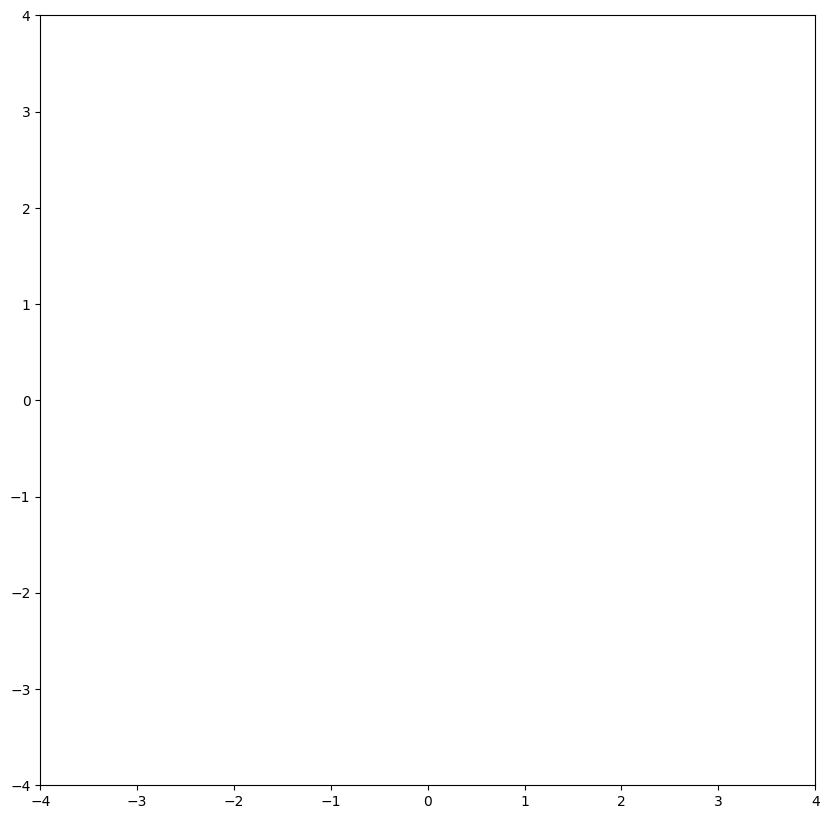

In [402]:
fig, ax = plt.subplots(figsize=(10,10))
artists = []

#create animation of the points moving
ax.set(xlim=(-4, 4), ylim=(-4, 4))

for t in range(0,numsteps, 1000):
    container = ax.scatter(p_x[:,:t], p_y[:,:t], s=1, color ="red", edgecolor="none")
    artists.append([container])

ani = animation.ArtistAnimation(fig=fig, artists=artists, interval=400)

#Save the animation as a video
ani.save('gravity_animation.mp4', writer='ffmpeg', fps=10)
    

In [403]:
#define function that calculates the kinetic energy of a point
def kinetic_energy(p_vx, p_vy, p_mass):
    return 0.5 * p_mass * (p_vx**2 + p_vy**2)

def potential_energy(p1x, p1y, p2x, p2y, p1mass, p2mass):
    G = 1e-1
    dx = p2x - p1x
    dy = p2y - p1y
    r = (dx**2 + dy**2+ softening**2)**0.5
    return -G * p1mass * p2mass / r


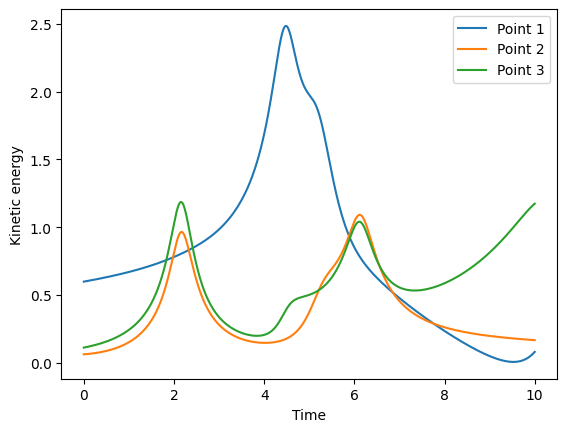

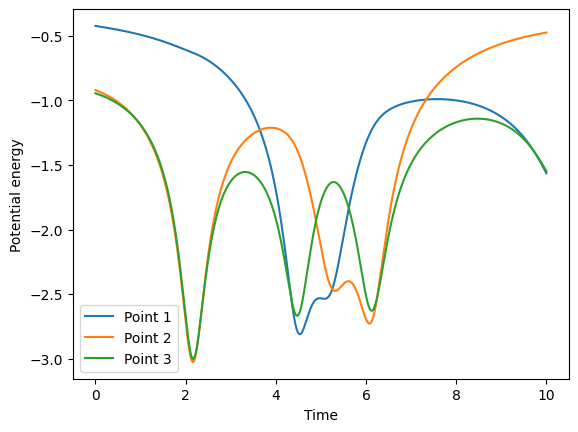

In [404]:
#plot the kinetic energy of the first point over time
for j in range(n):
    plt.plot(np.arange(numsteps)*stepsize, kinetic_energy(p_vx[j], p_vy[j], p_mass[j]), label = f'Point {j+1}')
plt.xlabel('Time')
plt.ylabel('Kinetic energy')
plt.legend()
plt.show()


#plot the potential energy of the first point over time

potential_energy_array = np.zeros((n,numsteps))
for j in range(n):
    for t in range(numsteps):
        for i in range(n):
            if i != j:
                potential_energy_array[j,t] += potential_energy(p_x[j,t], p_y[j,t], p_x[i,t], p_y[i,t], p_mass[j,t], p_mass[i,t]) 

for j in range(n):
    plt.plot(np.arange(numsteps)*stepsize, potential_energy_array[j,:], label = f'Point {j+1}')
plt.xlabel('Time')
plt.ylabel('Potential energy')
plt.legend()
plt.show()

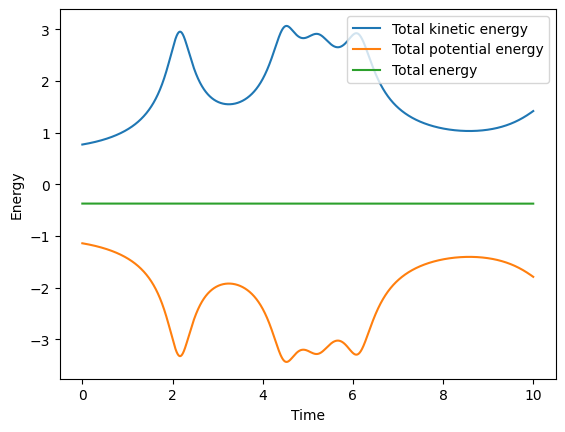

In [405]:
#plot total kinetic and total potential energy over time
total_kinetic_energy = np.sum(kinetic_energy(p_vx, p_vy, p_mass), axis=0)
total_potential_energy = 0.5*np.sum(potential_energy_array, axis=0) #divide by 2 because the potential energy is calculated twice for each pair of points

plt.plot(np.arange(numsteps)*stepsize, total_kinetic_energy, label = 'Total kinetic energy')
plt.plot(np.arange(numsteps)*stepsize, total_potential_energy, label = 'Total potential energy')
#plot total energy over time
plt.plot(np.arange(numsteps)*stepsize, total_kinetic_energy + total_potential_energy, label = 'Total energy')
plt.xlabel('Time')
plt.ylabel('Energy')
plt.legend()